In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import zscore
import warnings
warnings.filterwarnings("ignore")
import sklearn 
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv")
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [3]:
df.shape

(7752, 25)

In [4]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [5]:
df.tail()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3
7751,NaN,NaN,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.6450,127.135,212.3350,5.178230,5992.895996,38.9,29.8


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


Here we can see that only 1 column date has object datatype rest are float datatype

lets change th edatatype od date column to dattime datatype from object

In [7]:
import datetime as dt

In [8]:
df['Date']=pd.to_datetime(df['Date'])

In [9]:
df['Year']  = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day']   = df['Date'].dt.day

In [10]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
Year                 2
Month                2
Day                  2
dtype: int64

In [11]:
df.nunique()

station               25
Date                 310
Present_Tmax         167
Present_Tmin         155
LDAPS_RHmin         7672
LDAPS_RHmax         7664
LDAPS_Tmax_lapse    7675
LDAPS_Tmin_lapse    7675
LDAPS_WS            7675
LDAPS_LH            7675
LDAPS_CC1           7569
LDAPS_CC2           7582
LDAPS_CC3           7599
LDAPS_CC4           7524
LDAPS_PPT1          2812
LDAPS_PPT2          2510
LDAPS_PPT3          2356
LDAPS_PPT4          1918
lat                   12
lon                   25
DEM                   25
Slope                 27
Solar radiation     1575
Next_Tmax            183
Next_Tmin            157
Year                   5
Month                 12
Day                   21
dtype: int64

In [12]:
df['Month'].dtype

dtype('float64')

In [13]:
for i in df.columns:
    if df[i].dtype=="float64":
        df[i].fillna(df[i].median(),inplace=True)
    else:
        df[i].fillna(df[i].mode()[0],inplace=True)

In [14]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
Year                0
Month               0
Day                 0
dtype: int64

Now we have taken care of all the null values in the dataset

2015.0    1552
2013.0    1550
2014.0    1550
2016.0    1550
2017.0    1550
Name: Year, dtype: int64

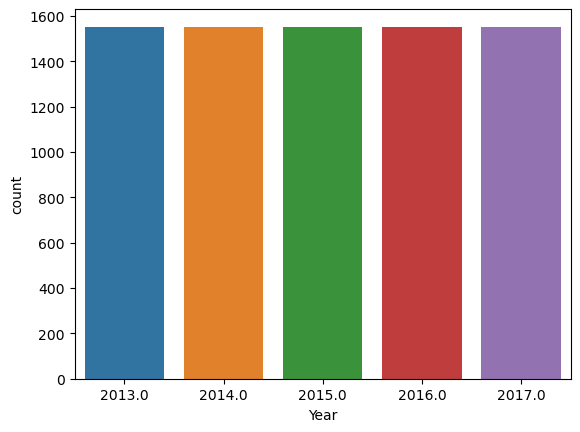

In [15]:
sns.countplot(x='Year',data=df)
df.Year.value_counts()

We can see that almost all the year have equal data distribution

7.0     2627
8.0     2500
6.0      375
1.0      250
2.0      250
3.0      250
4.0      250
5.0      250
9.0      250
10.0     250
11.0     250
12.0     250
Name: Month, dtype: int64

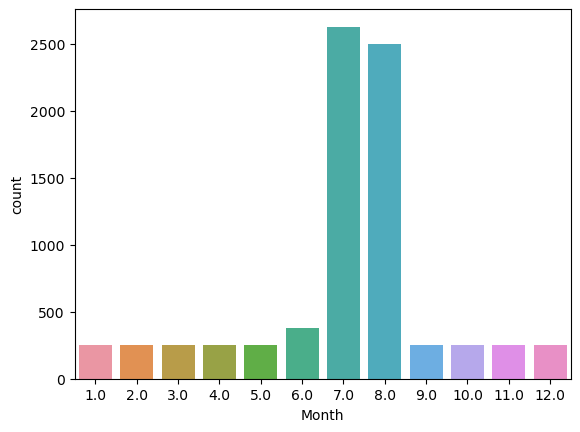

In [16]:
sns.countplot(x='Month',data=df)
df.Month.value_counts()

here we can see that the highest data is from july and august month

8.0     1500
7.0     1500
30.0     375
16.0     252
14.0     250
15.0     250
29.0     250
28.0     250
27.0     250
26.0     250
25.0     250
24.0     250
23.0     250
22.0     250
13.0     250
20.0     250
19.0     250
18.0     250
17.0     250
21.0     250
31.0     125
Name: Day, dtype: int64

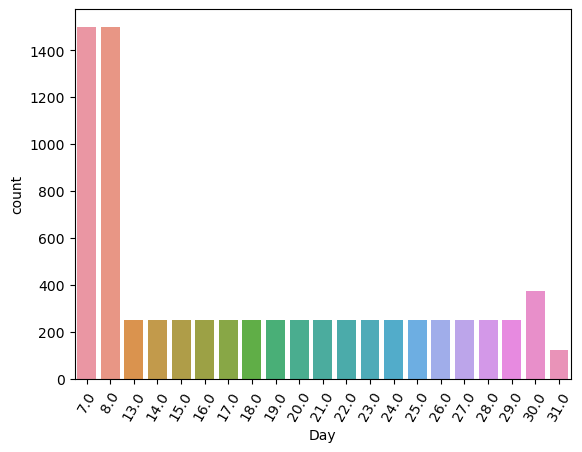

In [17]:
plt.xticks(rotation = 60)
sns.countplot(x='Day',data=df)
df['Day'].value_counts()

Here we can see that the highest number of datapoints are from 7th and 8th of the month.

In [18]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,...,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,13.000000,29.769401,23.226638,56.742728,88.388529,29.614317,23.514984,7.092549,62.450457,0.368260,...,37.544722,126.991397,61.867972,1.257048,5341.502803,30.275671,22.932804,2015.000000,7.080624,16.370872
std,7.210637,2.956583,2.403093,14.597945,7.158471,2.932911,2.334099,2.173913,33.571540,0.261236,...,0.050352,0.079435,54.279780,1.370444,429.158867,3.122585,2.483296,1.414122,2.238075,8.240270
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000,2013.000000,1.000000,7.000000
25%,7.000000,27.800000,21.700000,46.046162,84.316923,27.693091,22.114651,5.686487,37.532764,0.148321,...,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.400000,2014.000000,7.000000,8.000000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000,2015.000000,7.000000,16.000000
75%,19.000000,32.000000,24.900000,67.038254,93.704500,31.683819,25.134000,8.007471,83.904586,0.571696,...,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000,2016.000000,8.000000,24.000000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000,2017.000000,12.000000,31.000000


Observations:
1.) There are 7752 columns with no null values.
2.) Present_Tmax.Present_Tmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,Next_Tmin,Next_Tmax have their median greater than mean which indicates the presence of left skewed data.
3.) LDAPS_RHmin,LDAPS_WS,LDAPS_LH,DEM are right skewed data
4.) Difference in max value and 75th percentile is hign in lDAP_LH,DEM

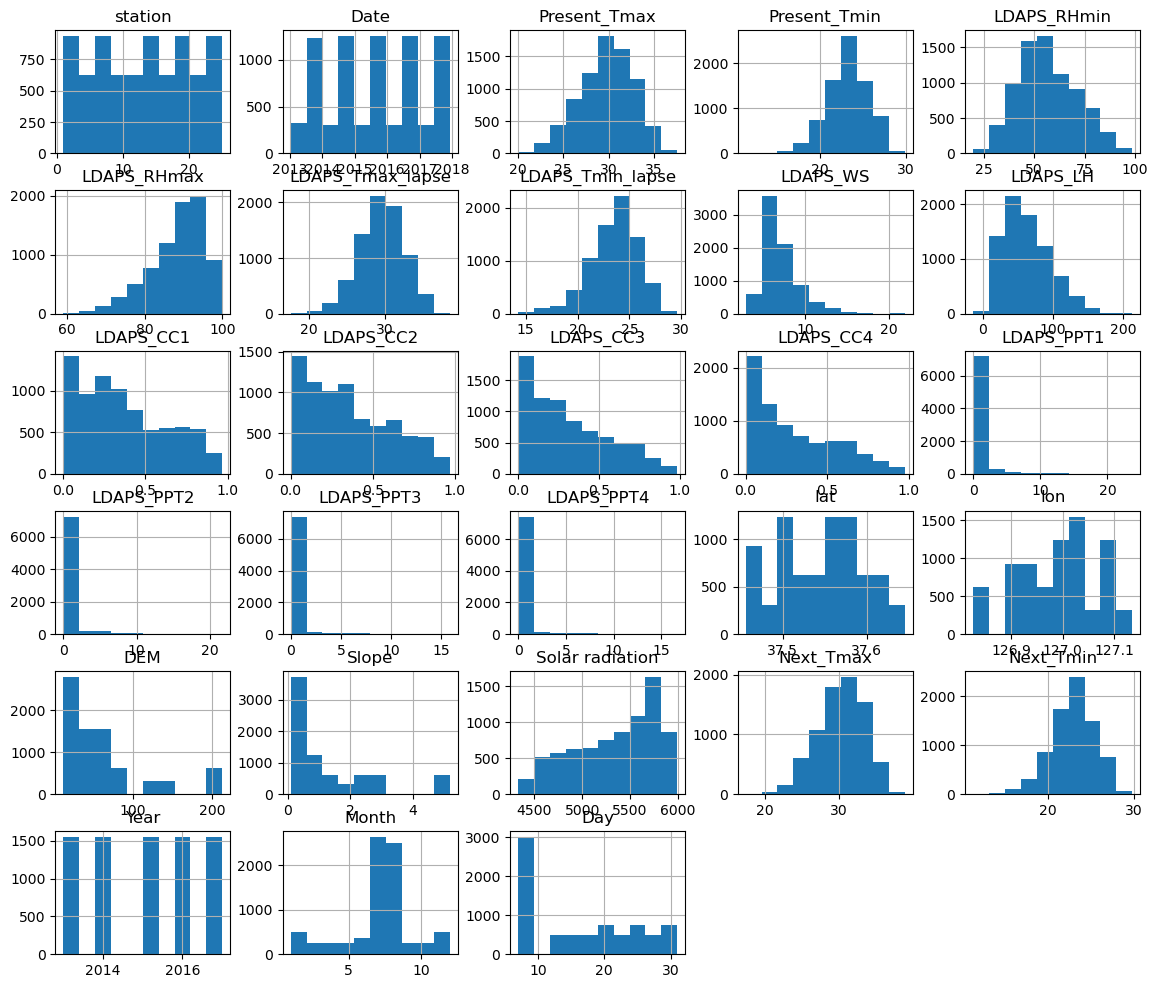

In [19]:
df.hist(figsize = (14,12));

Above histogram confirms the presence of skewness in the dataset

<Axes: >

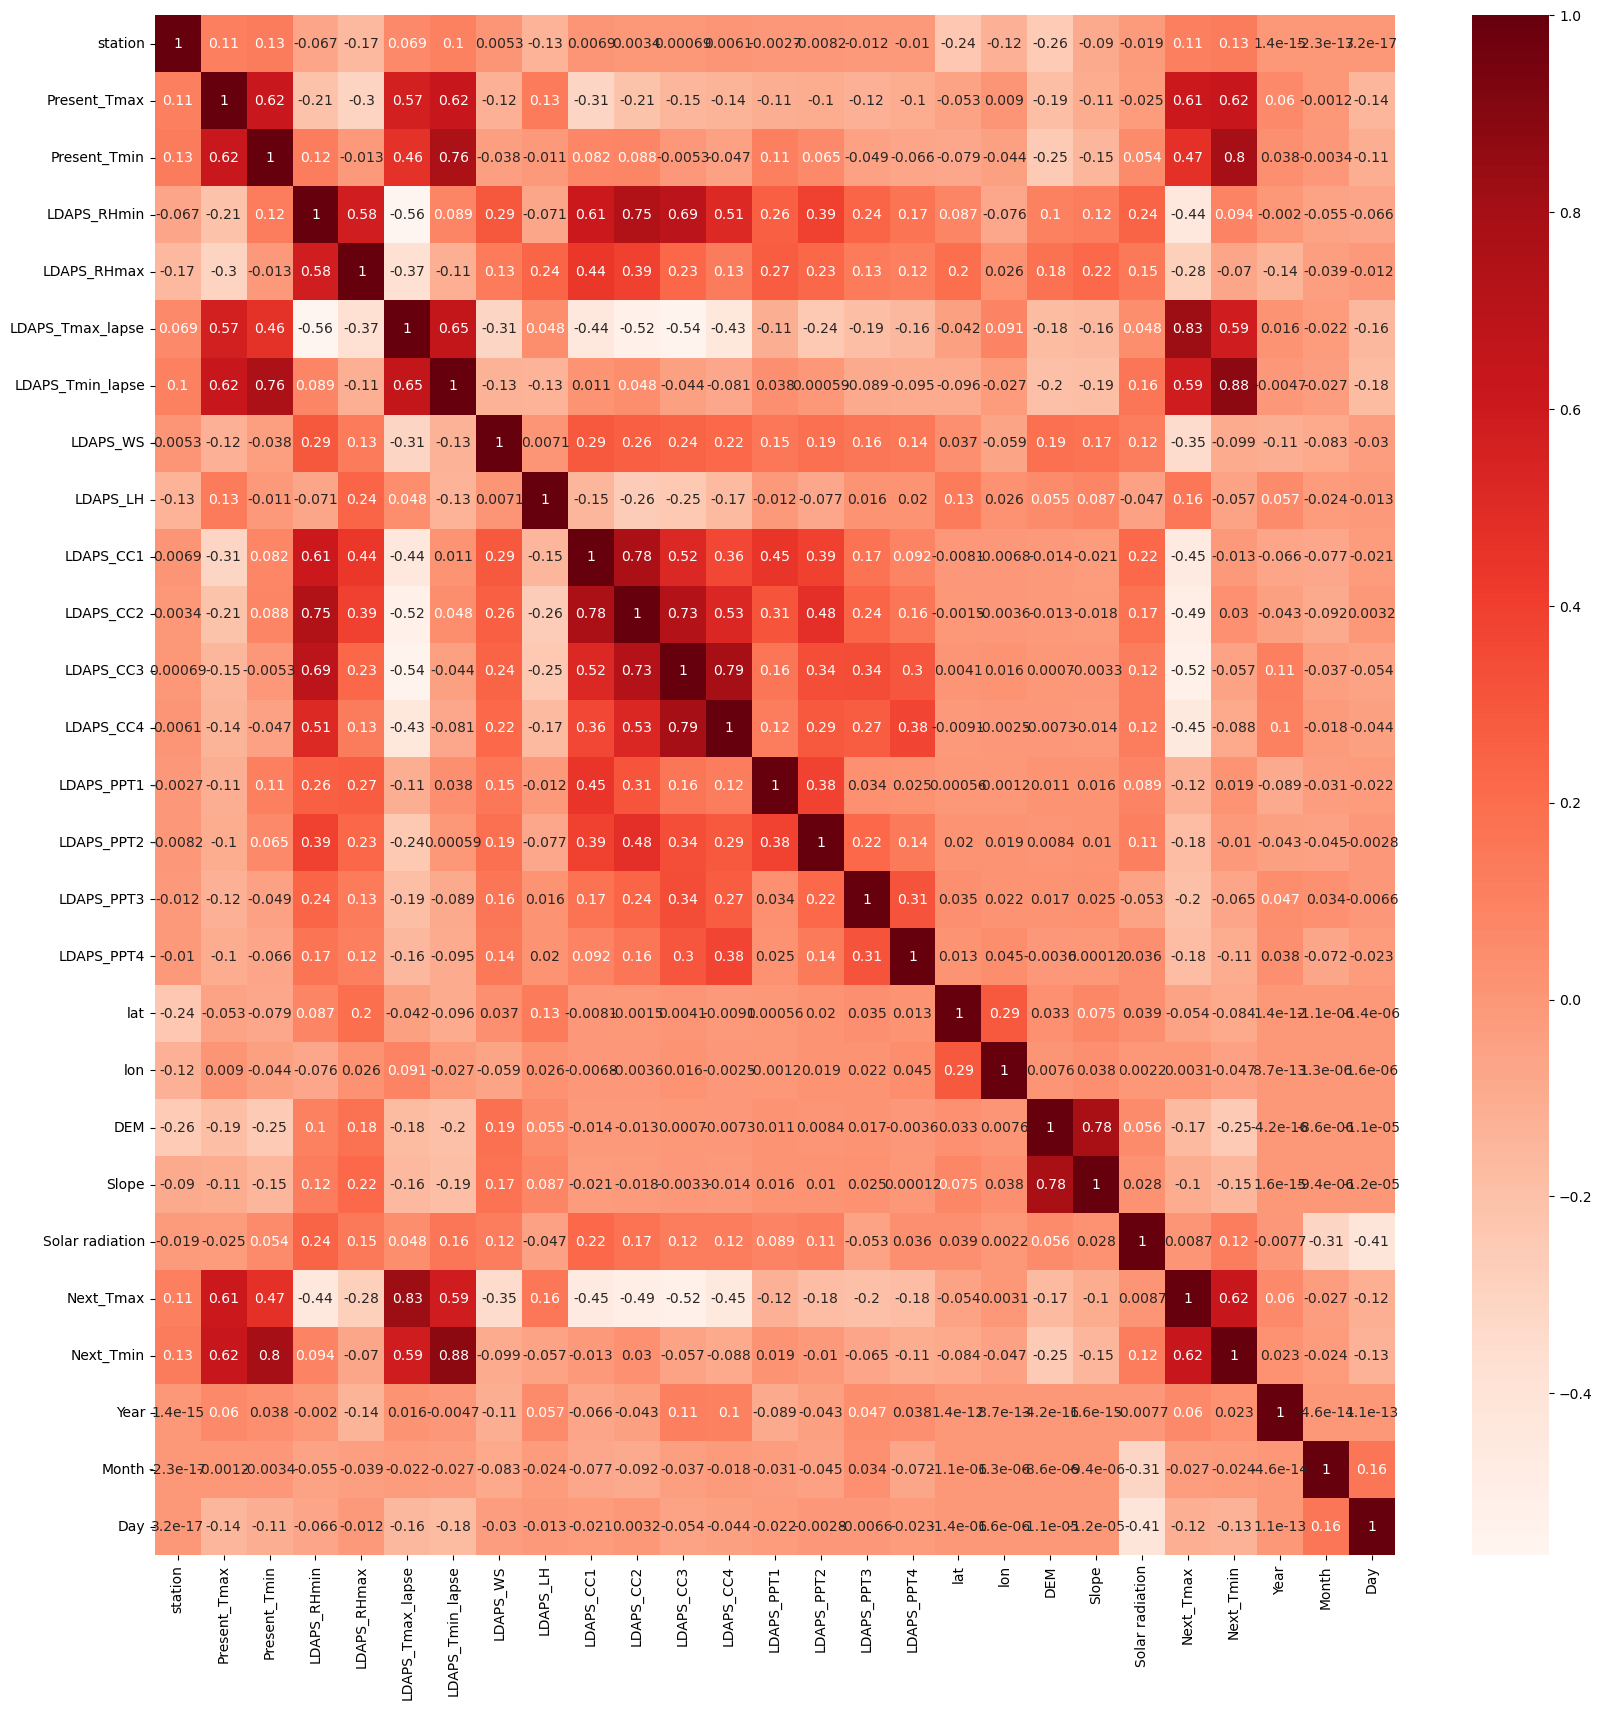

In [20]:
dfcor=df.corr()
plt.figure(figsize=(20,20)) 
sns.heatmap(dfcor, annot=True, cmap='Reds')

here we can see the correlation between various variables.
Next Tmax is positively correlated to nect tmin,LDAPS_Tmax_Lapse ,present tmax
Next tmin is positively correlated to ldaps_tmin lapse and present tmin
Next Tmax is negatively correlated to LDAPS_RHmin,LDAPS_CC1,CC2CC3 and CC4
Next t min is negatively correlated to DEM
Solar radiation is negatively correlated to Month and Day
Present Tmax,present tmin is positively correlated to present tmin,LDAPS_Tmax _Lapse.LDAPS_Tmin_Lapse
LDAPS_CC1,CC2,CC3 and CC4 are positively correlated with each other.

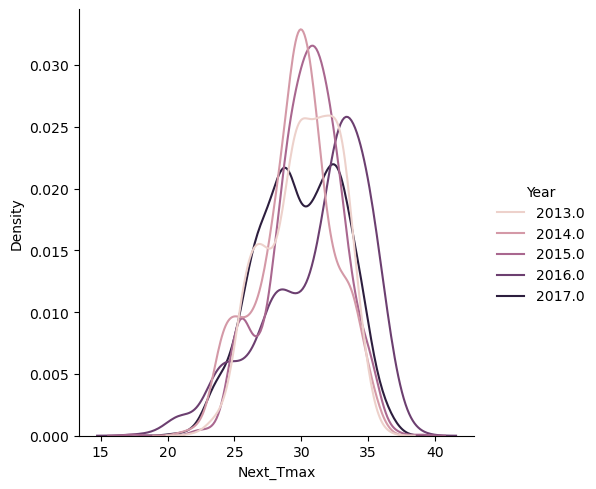

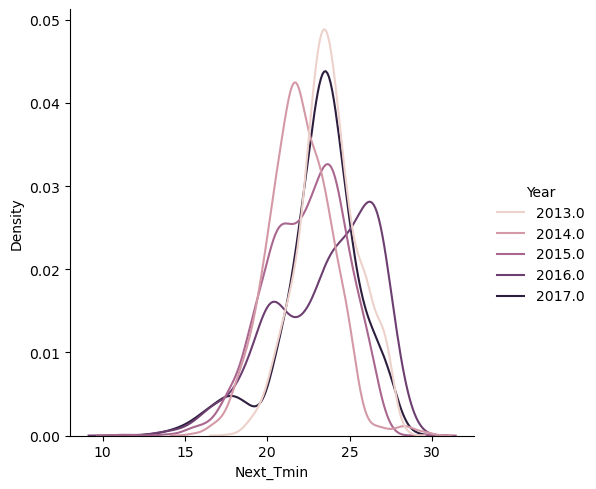

In [21]:
tmax= ["Next_Tmax", "Next_Tmin"]
for i in tmax:
    sns.displot(df, x=i, hue="Year", kind="kde")

Above we can see that Next_Tmin is highest in 2014 and min in 2017 while Next_Tmin is highest in 2013 and lowest in 2016

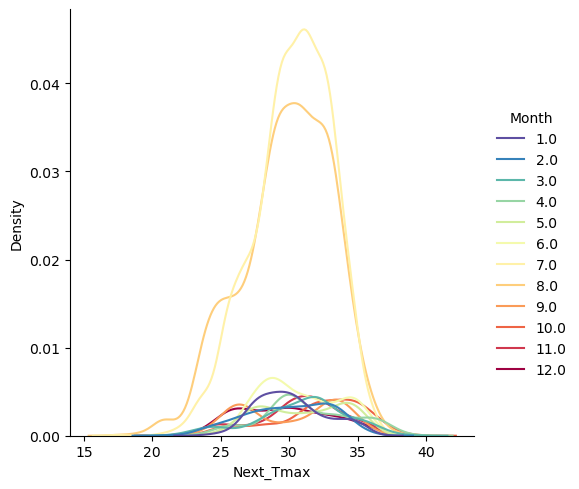

In [22]:
sns.displot(df, x='Next_Tmax', hue="Month", kind="kde",palette='Spectral_r')

Above we can see that july and august were the most hot months followed by june

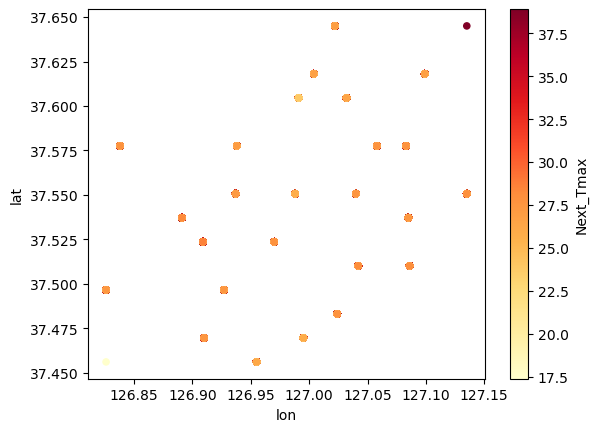

In [23]:
df.plot(x="lon", y="lat", kind="scatter", c="Next_Tmax", colormap="YlOrRd")
plt.show()

Above scatter plot shows next_tmax for all 25 regions

In [24]:
#we will drop date column
df=df.drop('Date',axis=1)

Let us also drop station column as it does not contribute to our target variable

In [25]:
df=df.drop('station',axis=1)

Present_Tmax           Axes(0.125,0.747241;0.110714x0.132759)
Present_Tmin        Axes(0.257857,0.747241;0.110714x0.132759)
LDAPS_RHmin         Axes(0.390714,0.747241;0.110714x0.132759)
LDAPS_RHmax         Axes(0.523571,0.747241;0.110714x0.132759)
LDAPS_Tmax_lapse    Axes(0.656429,0.747241;0.110714x0.132759)
LDAPS_Tmin_lapse    Axes(0.789286,0.747241;0.110714x0.132759)
LDAPS_WS               Axes(0.125,0.587931;0.110714x0.132759)
LDAPS_LH            Axes(0.257857,0.587931;0.110714x0.132759)
LDAPS_CC1           Axes(0.390714,0.587931;0.110714x0.132759)
LDAPS_CC2           Axes(0.523571,0.587931;0.110714x0.132759)
LDAPS_CC3           Axes(0.656429,0.587931;0.110714x0.132759)
LDAPS_CC4           Axes(0.789286,0.587931;0.110714x0.132759)
LDAPS_PPT1             Axes(0.125,0.428621;0.110714x0.132759)
LDAPS_PPT2          Axes(0.257857,0.428621;0.110714x0.132759)
LDAPS_PPT3          Axes(0.390714,0.428621;0.110714x0.132759)
LDAPS_PPT4          Axes(0.523571,0.428621;0.110714x0.132759)
lat     

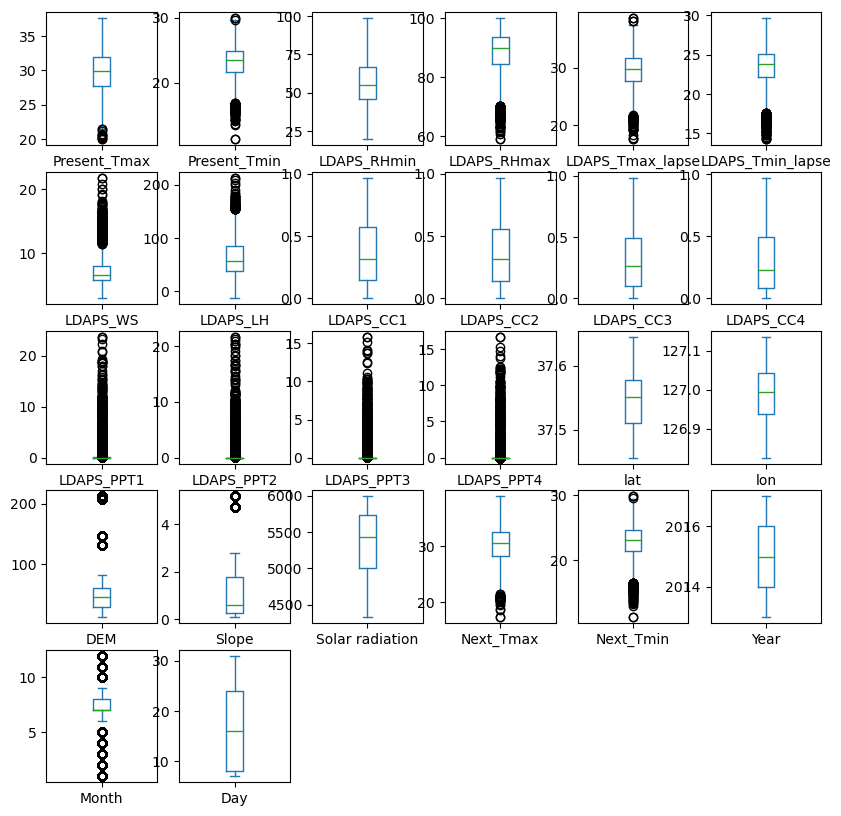

In [26]:
df.plot(kind='box',subplots=True,layout=(5,6),figsize=(10,10))

Above we can see the presence of outliers in Month,Next_Tmin,Next_Tmax,DEM,LDAPS_PPT4,LDAPS_PPT3,LDAPS_PPT2,LDAPS_PPT1,LDAPS_LH,LDAPS_WS,LDAPS_Tmin_lapse,LDAPS_Tmax_lapse,LDAPS_RHmax,Present_Tmin,Present_Tmax

In [27]:
#REmoving Outliers
z=np.abs(zscore(df[['Month','Next_Tmin','Next_Tmax','DEM','LDAPS_PPT4','LDAPS_PPT3','LDAPS_PPT2','LDAPS_PPT1','LDAPS_LH','LDAPS_WS','LDAPS_Tmin_lapse','LDAPS_Tmax_lapse','LDAPS_RHmax','Present_Tmin','Present_Tmax']]))

In [28]:
z

,Month,Next_Tmin,Next_Tmax,DEM,LDAPS_PPT4,LDAPS_PPT3,LDAPS_PPT2,LDAPS_PPT1,LDAPS_LH,LDAPS_WS,LDAPS_Tmin_lapse,LDAPS_Tmax_lapse,LDAPS_RHmax,Present_Tmin,Present_Tmax
0,0.482868,0.697829,0.376530,2.772243,0.222227,0.238242,0.273714,0.302656,0.208564,0.125893,0.217678,0.525183,0.381088,0.760169,0.361725
1,0.482868,0.174298,0.071845,0.315157,0.222227,0.238242,0.273714,0.302656,0.313173,0.644345,0.222809,0.080598,0.309610,0.676937,0.720675
2,0.482868,0.389506,0.264006,0.526218,0.222227,0.238242,0.273714,0.302656,1.247488,0.439018,0.450160,0.162639,0.616784,0.030530,0.619200
3,0.482868,0.550592,0.456167,0.297588,0.222227,0.238242,0.273714,0.302656,0.097609,0.663593,0.080896,0.030795,1.130923,0.072146,0.754500
4,0.482868,0.174298,0.296033,0.494322,0.222227,0.238242,0.273714,0.302656,1.355851,0.624511,0.012213,0.170621,0.246800,0.552090,0.551550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,0.410815,1.946251,0.632744,0.852681,0.222227,0.238242,0.273714,0.302656,0.286208,0.434099,2.030596,1.112358,1.329793,2.549645,2.188275
7748,0.410815,1.664349,0.536664,0.821213,0.222227,0.238242,0.273714,0.302656,0.453062,0.252892,2.048660,0.887955,1.549810,2.299950,2.188275
7749,0.410815,2.228152,0.792878,0.779043,0.222227,0.238242,0.273714,0.302656,1.589557,0.090494,2.138873,0.571074,1.556967,2.424798,2.222100
7750,0.036026,4.684723,4.123667,0.911963,0.222227,0.238242,0.273714,0.302656,2.265567,1.936712,3.959959,4.088135,4.114586,4.963357,3.304501


In [29]:
np.where(z>3)

(array([  25,   25,   26, ..., 7751, 7751, 7751], dtype=int64),
 array([ 6,  9,  6, ...,  8,  9, 11], dtype=int64))

In [30]:
df1=df[(z<3).all(axis=1)]
df1

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,2013.0,6.0,30.0
1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,2013.0,6.0,30.0
2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,2013.0,6.0,30.0
3,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,2013.0,6.0,30.0
4,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,2013.0,6.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,0.030169,...,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7,2017.0,8.0,30.0
7746,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,0.024518,...,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1,2017.0,8.0,30.0
7747,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,...,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1,2017.0,8.0,30.0
7748,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,...,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8,2017.0,8.0,30.0


In [31]:
print("Data Loss =",((df.shape[0]-df1.shape[0])/df.shape[0]))

Data Loss = 0.11068111455108359


Data Loss is approx 11% which is acceptable

In [32]:
#Skewness
df1.skew()

Present_Tmax       -0.273950
Present_Tmin       -0.227590
LDAPS_RHmin         0.309822
LDAPS_RHmax        -0.694148
LDAPS_Tmax_lapse   -0.110448
LDAPS_Tmin_lapse   -0.386322
LDAPS_WS            1.097251
LDAPS_LH            0.574066
LDAPS_CC1           0.600830
LDAPS_CC2           0.506876
LDAPS_CC3           0.708018
LDAPS_CC4           0.720393
LDAPS_PPT1          3.749975
LDAPS_PPT2          4.869067
LDAPS_PPT3          5.515722
LDAPS_PPT4          5.969876
lat                 0.108251
lon                -0.275508
DEM                 1.764031
Slope               1.593600
Solar radiation    -0.505353
Next_Tmax          -0.270929
Next_Tmin          -0.238547
Year                0.010998
Month              -0.683578
Day                 0.255263
dtype: float64

In [33]:
#2
df1['LDAPS_WS']=np.cbrt(df1['LDAPS_WS'])

In [34]:
from scipy.stats import yeojohnson

In [35]:
#2
df1['LDAPS_RHmax']=yeojohnson(df1['LDAPS_RHmax'],4)

In [36]:
df1['LDAPS_LH']=np.cbrt(df1['LDAPS_LH'])

In [37]:
df1['LDAPS_CC1']=np.cbrt(df1['LDAPS_CC1'])

In [38]:
df1['LDAPS_CC2']=np.cbrt(df1['LDAPS_CC2'])

In [39]:
df1['LDAPS_CC3']=np.cbrt(df1['LDAPS_CC3'])

In [40]:
df1['LDAPS_CC4']=np.cbrt(df1['LDAPS_CC4'])

In [41]:
df1['LDAPS_PPT1']=np.cbrt(df1['LDAPS_PPT1'])

In [42]:
df1['LDAPS_PPT2']=np.cbrt(df1['LDAPS_PPT2'])

In [43]:
df1['LDAPS_PPT3']=np.cbrt(df1['LDAPS_PPT3'])

In [44]:
df1['LDAPS_PPT4']=np.cbrt(df1['LDAPS_PPT4'])

In [45]:
df1['DEM']=np.cbrt(df1['DEM'])

In [46]:
df1['Slope']=np.cbrt(df1['Slope'])

In [47]:
df1.skew()

Present_Tmax       -0.273950
Present_Tmin       -0.227590
LDAPS_RHmin         0.309822
LDAPS_RHmax        -0.205149
LDAPS_Tmax_lapse   -0.110448
LDAPS_Tmin_lapse   -0.386322
LDAPS_WS            0.626989
LDAPS_LH           -0.272678
LDAPS_CC1          -0.659210
LDAPS_CC2          -0.762391
LDAPS_CC3          -0.556950
LDAPS_CC4          -0.421529
LDAPS_PPT1          1.936045
LDAPS_PPT2          2.351539
LDAPS_PPT3          2.517849
LDAPS_PPT4          2.872958
lat                 0.108251
lon                -0.275508
DEM                 0.934952
Slope               0.621552
Solar radiation    -0.505353
Next_Tmax          -0.270929
Next_Tmin          -0.238547
Year                0.010998
Month              -0.683578
Day                 0.255263
dtype: float64

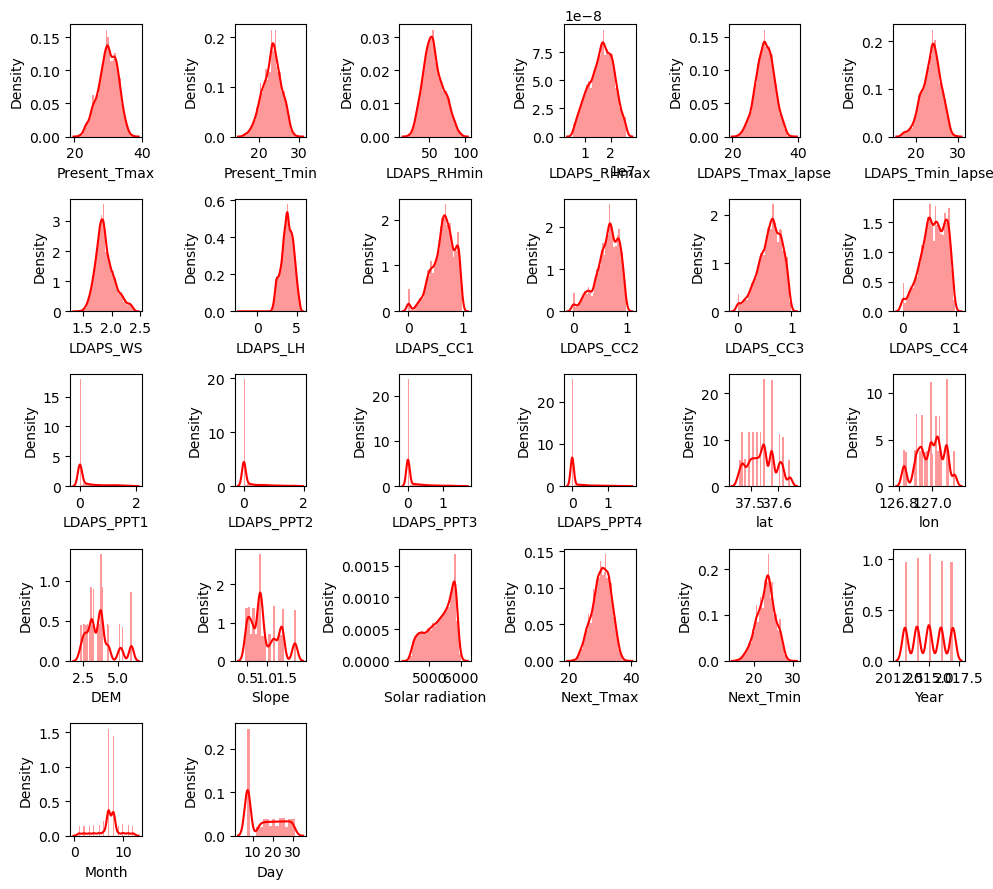

In [48]:
#To check skewness in df1 after transformation
plt.figure(figsize=(10,9))
plotnumber=1
for col in df1:
    if plotnumber<=26:
        ax=plt.subplot(5,6,plotnumber)
        sns.distplot(df1[col],color='r')
    plotnumber+=1
plt.tight_layout()    

Now we can see that the skewness has reduced.

In [49]:
df1cor=df1.corr()

<Axes: >

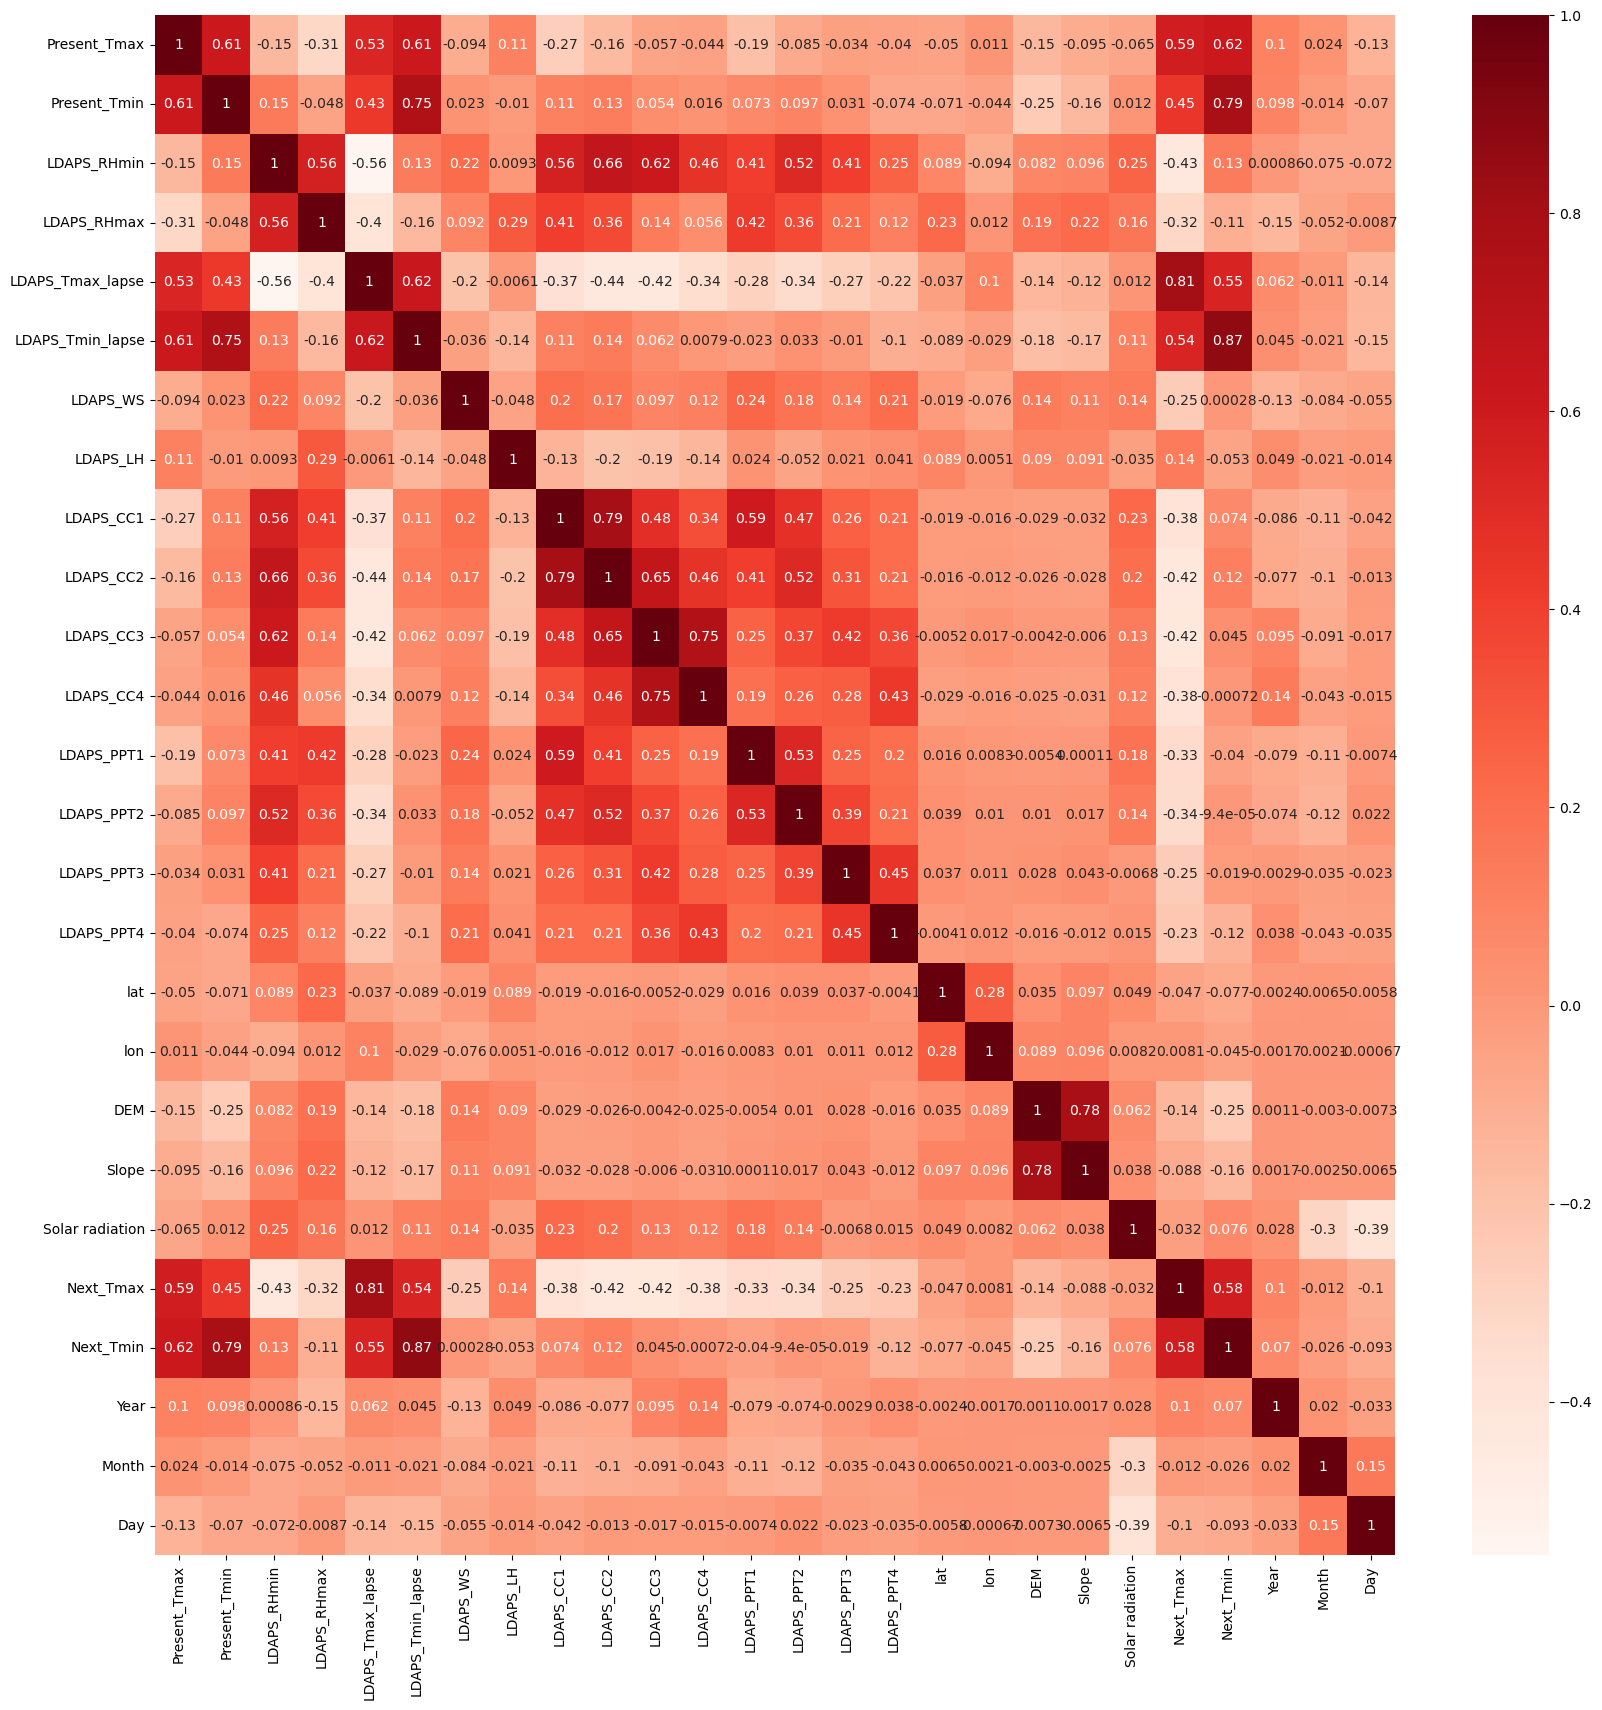

In [50]:
plt.figure(figsize=(20,20))
sns.heatmap(df1cor,annot=True,cmap='Reds')

In [51]:
df1cor['Next_Tmax'].sort_values(ascending=False)

Next_Tmax           1.000000
LDAPS_Tmax_lapse    0.806079
Present_Tmax        0.586336
Next_Tmin           0.584850
LDAPS_Tmin_lapse    0.540234
Present_Tmin        0.446589
LDAPS_LH            0.138172
Year                0.099577
lon                 0.008077
Month              -0.011697
Solar radiation    -0.031555
lat                -0.047267
Slope              -0.088163
Day                -0.100300
DEM                -0.139617
LDAPS_PPT4         -0.230433
LDAPS_WS           -0.251549
LDAPS_PPT3         -0.254949
LDAPS_RHmax        -0.317461
LDAPS_PPT1         -0.332359
LDAPS_PPT2         -0.336915
LDAPS_CC4          -0.379882
LDAPS_CC1          -0.384369
LDAPS_CC3          -0.420522
LDAPS_CC2          -0.422094
LDAPS_RHmin        -0.429587
Name: Next_Tmax, dtype: float64

Above we can see the correlation of all columns with Next_Tmax

In [52]:
df1cor['Next_Tmin'].sort_values(ascending=False)

Next_Tmin           1.000000
LDAPS_Tmin_lapse    0.868226
Present_Tmin        0.785270
Present_Tmax        0.616823
Next_Tmax           0.584850
LDAPS_Tmax_lapse    0.547280
LDAPS_RHmin         0.132451
LDAPS_CC2           0.119691
Solar radiation     0.075749
LDAPS_CC1           0.073962
Year                0.070438
LDAPS_CC3           0.044806
LDAPS_WS            0.000278
LDAPS_PPT2         -0.000094
LDAPS_CC4          -0.000724
LDAPS_PPT3         -0.019279
Month              -0.026143
LDAPS_PPT1         -0.040393
lon                -0.045120
LDAPS_LH           -0.053230
lat                -0.077102
Day                -0.092987
LDAPS_RHmax        -0.106654
LDAPS_PPT4         -0.121936
Slope              -0.157356
DEM                -0.246113
Name: Next_Tmin, dtype: float64

Above we can see the correlation of all columns with Next_Tmin

In [53]:
#Now separating dependent and independent variables for predicting Next_Tmax
x=df1.drop('Next_Tmax',axis=1)
y=df1['Next_Tmax']

In [54]:
x.shape

(6894, 25)

In [55]:
#Now separating dependent and independent variables for predicting Next_Tmin
x1=df1.drop('Next_Tmin',axis=1)
y1=df1['Next_Tmin']

In [56]:
x1.shape

(6894, 25)

In [57]:
#now we will scale x_max
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmin,Year,Month,Day
0,-0.434050,-0.829175,0.192637,0.363699,-0.662061,-0.291984,0.063646,0.392172,-0.134751,-0.196566,...,-0.404668,1.214518,0.002256,2.365582,1.294103,1.552067,-0.801078,-1.423423,-0.487286,1.662899
1,0.687149,-0.742467,-0.240864,0.277962,-0.012462,0.172135,-0.623611,-0.112453,-0.170824,0.002587,...,-0.404668,1.214518,0.516874,-0.136077,-0.414528,1.257875,-0.248632,-1.423423,-0.487286,1.662899
2,0.582037,-0.005452,-0.499340,-0.709987,0.075514,0.411682,-0.341440,-1.430138,-0.242514,0.024552,...,-0.404668,0.674104,0.843217,-0.481176,-0.859812,1.244171,0.346310,-1.423423,-0.487286,1.662899
3,0.722187,0.037902,0.191486,1.353035,-0.065867,-0.147864,-0.650809,0.292659,-0.210905,-0.101117,...,-0.404668,2.023139,0.391357,-0.110145,1.171532,1.228481,0.516293,-1.423423,-0.487286,1.662899
4,0.511962,-0.612406,0.042048,0.203799,-0.281852,-0.075496,-0.595724,1.258112,-0.534878,-0.004328,...,-0.404668,0.135691,1.809694,-0.424409,-0.427196,1.234641,-0.248632,-1.423423,-0.487286,1.662899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6889,-2.396149,-2.389912,-2.235680,-1.394606,-0.757642,-2.415547,-0.061645,-2.246273,-1.292820,-1.484669,...,-0.404668,0.135691,0.617287,-0.733566,-0.332574,-2.106479,-2.288433,1.433784,0.404498,1.662899
6890,-2.606374,-2.563327,-1.844604,-0.747411,-1.162701,-2.636293,-0.574423,0.706758,-1.150140,-1.581266,...,-0.404668,-0.674931,1.194663,-0.912903,-1.233496,-2.140332,-2.543409,1.433784,0.404498,1.662899
6891,-2.326074,-2.693388,-2.087210,-1.328348,-1.291709,-2.202165,-0.334850,0.459713,-1.603313,-0.920539,...,-0.404668,-0.134517,-1.252910,-1.226355,-1.157554,-2.136737,-2.118450,1.433784,0.404498,1.662899
6892,-2.326074,-2.433266,-2.282585,-1.496748,-1.051074,-2.221197,-0.097248,-0.266731,-1.512097,-0.972066,...,-0.404668,-0.404724,-1.026980,-1.135108,-0.965362,-2.148498,-1.820979,1.433784,0.404498,1.662899


In [58]:
#now we will scale x1
scaler=StandardScaler()
x1=pd.DataFrame(scaler.fit_transform(x1),columns=x1.columns)
x1

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Year,Month,Day
0,-0.434050,-0.829175,0.192637,0.363699,-0.662061,-0.291984,0.063646,0.392172,-0.134751,-0.196566,...,-0.404668,1.214518,0.002256,2.365582,1.294103,1.552067,-0.499372,-1.423423,-0.487286,1.662899
1,0.687149,-0.742467,-0.240864,0.277962,-0.012462,0.172135,-0.623611,-0.112453,-0.170824,0.002587,...,-0.404668,1.214518,0.516874,-0.136077,-0.414528,1.257875,-0.021986,-1.423423,-0.487286,1.662899
2,0.582037,-0.005452,-0.499340,-0.709987,0.075514,0.411682,-0.341440,-1.430138,-0.242514,0.024552,...,-0.404668,0.674104,0.843217,-0.481176,-0.859812,1.244171,0.182608,-1.423423,-0.487286,1.662899
3,0.722187,0.037902,0.191486,1.353035,-0.065867,-0.147864,-0.650809,0.292659,-0.210905,-0.101117,...,-0.404668,2.023139,0.391357,-0.110145,1.171532,1.228481,0.387202,-1.423423,-0.487286,1.662899
4,0.511962,-0.612406,0.042048,0.203799,-0.281852,-0.075496,-0.595724,1.258112,-0.534878,-0.004328,...,-0.404668,0.135691,1.809694,-0.424409,-0.427196,1.234641,0.216707,-1.423423,-0.487286,1.662899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6889,-2.396149,-2.389912,-2.235680,-1.394606,-0.757642,-2.415547,-0.061645,-2.246273,-1.292820,-1.484669,...,-0.404668,0.135691,0.617287,-0.733566,-0.332574,-2.106479,-1.010857,1.433784,0.404498,1.662899
6890,-2.606374,-2.563327,-1.844604,-0.747411,-1.162701,-2.636293,-0.574423,0.706758,-1.150140,-1.581266,...,-0.404668,-0.674931,1.194663,-0.912903,-1.233496,-2.140332,-0.874461,1.433784,0.404498,1.662899
6891,-2.326074,-2.693388,-2.087210,-1.328348,-1.291709,-2.202165,-0.334850,0.459713,-1.603313,-0.920539,...,-0.404668,-0.134517,-1.252910,-1.226355,-1.157554,-2.136737,-0.772164,1.433784,0.404498,1.662899
6892,-2.326074,-2.433266,-2.282585,-1.496748,-1.051074,-2.221197,-0.097248,-0.266731,-1.512097,-0.972066,...,-0.404668,-0.404724,-1.026980,-1.135108,-0.965362,-2.148498,-0.669867,1.433784,0.404498,1.662899


In [59]:
#Checking VIF for x
vif=pd.DataFrame()
vif["Features"]=x.columns
vif["VIF Values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

,Features,VIF Values
0,Present_Tmax,2.756281
1,Present_Tmin,3.309542
2,LDAPS_RHmin,6.180196
3,LDAPS_RHmax,2.549205
4,LDAPS_Tmax_lapse,6.878131
5,LDAPS_Tmin_lapse,8.655506
6,LDAPS_WS,1.260458
7,LDAPS_LH,1.441114
8,LDAPS_CC1,4.060506
9,LDAPS_CC2,4.554938


Above we can see that their is multicolinearity present between LDAPS_Tmin_lapse and LDAPS_Tmax_lapse. So we will drop LDAPS_Tmin_lapse

In [60]:
x=x.drop("LDAPS_Tmin_lapse",axis=1)

In [61]:
#again checking the vif
vif=pd.DataFrame()
vif["Features"]=x.columns
vif["VIF Values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

,Features,VIF Values
0,Present_Tmax,2.631856
1,Present_Tmin,3.208591
2,LDAPS_RHmin,4.784400
3,LDAPS_RHmax,2.465769
4,LDAPS_Tmax_lapse,4.273375
5,LDAPS_WS,1.256830
6,LDAPS_LH,1.376406
7,LDAPS_CC1,3.949233
8,LDAPS_CC2,4.533074
9,LDAPS_CC3,3.861969


In [62]:
x=x.drop('LDAPS_RHmin',axis=1)

In [63]:
x=x.drop('LDAPS_CC2',axis=1)

In [64]:
#again checking the vif
vif=pd.DataFrame()
vif["Features"]=x.columns
vif["VIF Values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

,Features,VIF Values
0,Present_Tmax,2.592207
1,Present_Tmin,3.161490
2,LDAPS_RHmax,2.113511
3,LDAPS_Tmax_lapse,2.988822
4,LDAPS_WS,1.256658
5,LDAPS_LH,1.343551
6,LDAPS_CC1,2.436749
7,LDAPS_CC3,3.323489
8,LDAPS_CC4,2.577668
9,LDAPS_PPT1,1.949631


Now the VIF is in acceptable range

In [65]:
#VIF for x1
vif=pd.DataFrame()
vif["Features"]=x1.columns
vif["VIF Values"]=[variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif

,Features,VIF Values
0,Present_Tmax,2.841189
1,Present_Tmin,3.053287
2,LDAPS_RHmin,6.147165
3,LDAPS_RHmax,2.542037
4,LDAPS_Tmax_lapse,8.224352
5,LDAPS_Tmin_lapse,7.106278
6,LDAPS_WS,1.265652
7,LDAPS_LH,1.468217
8,LDAPS_CC1,4.064582
9,LDAPS_CC2,4.546524


Above we can see that their is multicolinearity present between LDAPS_Tmin_lapse and LDAPS_Tmax_lapse. So we will drop LDAPS_Tmax_lapse

In [66]:
x1=x1.drop('LDAPS_Tmax_lapse',axis=1)

In [67]:
#again checking the vif
vif=pd.DataFrame()
vif["Features"]=x1.columns
vif["VIF Values"]=[variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif

,Features,VIF Values
0,Present_Tmax,2.760488
1,Present_Tmin,3.053130
2,LDAPS_RHmin,3.784098
3,LDAPS_RHmax,2.509305
4,LDAPS_Tmin_lapse,3.873550
5,LDAPS_WS,1.264547
6,LDAPS_LH,1.467154
7,LDAPS_CC1,4.020613
8,LDAPS_CC2,4.478848
9,LDAPS_CC3,3.882256


In [68]:
x1=x1.drop('LDAPS_CC2',axis=1)

In [69]:
#again checking the vif
vif=pd.DataFrame()
vif["Features"]=x1.columns
vif["VIF Values"]=[variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif

,Features,VIF Values
0,Present_Tmax,2.734640
1,Present_Tmin,3.053096
2,LDAPS_RHmin,3.679263
3,LDAPS_RHmax,2.495519
4,LDAPS_Tmin_lapse,3.870556
5,LDAPS_WS,1.264542
6,LDAPS_LH,1.441876
7,LDAPS_CC1,2.477079
8,LDAPS_CC3,3.603902
9,LDAPS_CC4,2.629370


Now it is in acceptable range

# MODEL BUILDING TO PREDICT Next_Tmax

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [71]:
#Now we find the best random state with x and y
maxRS=0
maxaccu=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Maximum r2 score is ",maxaccu, "at random state ",maxRS)

Maximum r2 score is  0.7876026061251384 at random state  78


In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=maxRS)

In [73]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)
print(LR)
print("R2_Score : ",r2_score(y_test,pred_LR))
print("R2_Score on Training Data :", r2_score(y_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y_test,pred_LR))
print("Mean Squared Error:", mean_squared_error(y_test,pred_LR))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,pred_LR)) )

LinearRegression()
R2_Score :  0.7876026061251384
R2_Score on Training Data : 0.7543966767973467
Mean Absolute Error: 1.0635973204417748
Mean Squared Error: 1.9277757008125018
Root Mean Squared Error: 1.3884436253634866


In [74]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print(RFR)
print("R2_Score : ",r2_score(y_test,pred_RFR))
print("R2_Score on Training Data :", r2_score(y_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y_test,pred_RFR))
print("Mean Squared Error:", mean_squared_error(y_test,pred_RFR))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,pred_RFR)) )

RandomForestRegressor()
R2_Score :  0.9071889734045465
R2_Score on Training Data : 0.9850068038379067
Mean Absolute Error: 0.6892262180974473
Mean Squared Error: 0.8423777645011595
Root Mean Squared Error: 0.9178113991998353


In [75]:
KNR=KNeighborsRegressor()
KNR.fit(x_train,y_train)
pred_KNR=KNR.predict(x_test)
pred_train=KNR.predict(x_train)
print(KNR)
print("R2_Score : ",r2_score(y_test,pred_KNR))
print("R2_Score on Training Data :", r2_score(y_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y_test,pred_KNR))
print("Mean Squared Error:", mean_squared_error(y_test,pred_KNR))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,pred_KNR)) )

KNeighborsRegressor()
R2_Score :  0.8901484897704725
R2_Score on Training Data : 0.9177660741110633
Mean Absolute Error: 0.7366589327146171
Mean Squared Error: 0.9970417633410671
Root Mean Squared Error: 0.9985197861540186


In [76]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)
print(GBR)
print("R2_Score : ",r2_score(y_test,pred_GBR))
print("R2_Score on Training Data :", r2_score(y_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y_test,pred_GBR))
print("Mean Squared Error:", mean_squared_error(y_test,pred_GBR))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,pred_GBR)) )

GradientBoostingRegressor()
R2_Score :  0.8651913726900029
R2_Score on Training Data : 0.8728893525967407
Mean Absolute Error: 0.8504882499282623
Mean Squared Error: 1.2235592501724166
Root Mean Squared Error: 1.1061461251446016


In [77]:
svr=SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
pred_train=svr.predict(x_train)
print(svr)
print("R2_Score : ",r2_score(y_test,pred_svr))
print("R2_Score on Training Data :", r2_score(y_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y_test,pred_svr))
print("Mean Squared Error:", mean_squared_error(y_test,pred_svr))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,pred_svr)) )

SVR()
R2_Score :  0.8919430222447778
R2_Score on Training Data : 0.8960556691874259
Mean Absolute Error: 0.7244524705798514
Mean Squared Error: 0.9807541054034045
Root Mean Squared Error: 0.990330301163912


In [78]:
lasso=Lasso()
lasso.fit(x_train,y_train)
pred_lasso=lasso.predict(x_test)
pred_train=lasso.predict(x_train)
print(lasso)
print("R2_Score : ",r2_score(y_test,pred_lasso))
print("R2_Score on Training Data :", r2_score(y_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y_test,pred_lasso))
print("Mean Squared Error:", mean_squared_error(y_test,pred_lasso))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,pred_lasso)) )

Lasso()
R2_Score :  0.5246022146792289
R2_Score on Training Data : 0.527496497412228
Mean Absolute Error: 1.636532403422068
Mean Squared Error: 4.314837776688601
Root Mean Squared Error: 2.077218759950093


In [79]:
ridge=Ridge()
ridge.fit(x_train,y_train)
pred_ridge=ridge.predict(x_test)
pred_train=ridge.predict(x_train)
print(ridge)
print("R2_Score : ",r2_score(y_test,pred_ridge))
print("R2_Score on Training Data :", r2_score(y_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y_test,pred_ridge))
print("Mean Squared Error:", mean_squared_error(y_test,pred_ridge))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,pred_ridge)) )

Ridge()
R2_Score :  0.7876029878782453
R2_Score on Training Data : 0.7543966528985433
Mean Absolute Error: 1.063600397676279
Mean Squared Error: 1.9277722359189366
Root Mean Squared Error: 1.388442377601223


In [80]:
EN=ElasticNet()
EN.fit(x_train,y_train)
pred_EN=EN.predict(x_test)
pred_train=EN.predict(x_train)
print(EN)
print("R2_Score : ",r2_score(y_test,pred_EN))
print("R2_Score on Training Data :", r2_score(y_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y_test,pred_EN))
print("Mean Squared Error:", mean_squared_error(y_test,pred_EN))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,pred_EN)) )

ElasticNet()
R2_Score :  0.5989711616360274
R2_Score on Training Data : 0.5974565920077719
Mean Absolute Error: 1.5103035695675535
Mean Squared Error: 3.63984527220054
Root Mean Squared Error: 1.9078378527014659


In [81]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
pred_train=dtr.predict(x_train)
print(dtr)
print("R2_Score : ",r2_score(y_test,pred_dtr))
print("R2_Score on Training Data :", r2_score(y_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y_test,pred_dtr))
print("Mean Squared Error:", mean_squared_error(y_test,pred_dtr))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,pred_dtr)) )

DecisionTreeRegressor()
R2_Score :  0.7987862112731601
R2_Score on Training Data : 1.0
Mean Absolute Error: 0.9718677494199536
Mean Squared Error: 1.8262703016241297
Root Mean Squared Error: 1.351395686549328


In [82]:
ad=AdaBoostRegressor()
ad.fit(x_train,y_train)
pred_ad=ad.predict(x_test)
pred_train=ad.predict(x_train)
print(ad)
print("R2_Score : ",r2_score(y_test,pred_ad))
print("R2_Score on Training Data :", r2_score(y_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y_test,pred_ad))
print("Mean Squared Error:", mean_squared_error(y_test,pred_ad))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,pred_ad)))

AdaBoostRegressor()
R2_Score :  0.7586620091321518
R2_Score on Training Data : 0.756320572567929
Mean Absolute Error: 1.1949363642479627
Mean Squared Error: 2.190448319493301
Root Mean Squared Error: 1.480016324063117


In [83]:
br=BaggingRegressor()
br.fit(x_train,y_train)
pred_br=br.predict(x_test)
pred_train=br.predict(x_train)
print(br)
print("R2_Score : ",r2_score(y_test,pred_br))
print("R2_Score on Training Data :", r2_score(y_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y_test,pred_br))
print("Mean Squared Error:", mean_squared_error(y_test,pred_br))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,pred_br)))

BaggingRegressor()
R2_Score :  0.8919387901091291
R2_Score on Training Data : 0.9778345134676446
Mean Absolute Error: 0.7397273781902552
Mean Squared Error: 0.9807925174013921
Root Mean Squared Error: 0.9903496945025995


In [84]:
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr=etr.predict(x_test)
pred_train=etr.predict(x_train)
print(etr)
print("R2_Score : ",r2_score(y_test,pred_etr))
print("R2_Score on Training Data :", r2_score(y_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y_test,pred_etr))
print("Mean Squared Error:", mean_squared_error(y_test,pred_etr))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,pred_etr)))

ExtraTreesRegressor()
R2_Score :  0.9297817239268986
R2_Score on Training Data : 1.0
Mean Absolute Error: 0.5972378190255218
Mean Squared Error: 0.6373199025522036
Root Mean Squared Error: 0.7983231817705181


In [85]:
R2_Score=pd.DataFrame([['etr',r2_score(y_test,pred_etr)],['LR',r2_score(y_test,pred_LR)],['BR',r2_score(y_test,pred_br)],['ADR',r2_score(y_test,pred_ad)],['SVR',r2_score(y_test,pred_svr)],['DTR',r2_score(y_test,pred_dtr)],['EN',r2_score(y_test,pred_EN)],['Ridge',r2_score(y_test,pred_ridge)],['Lasso',r2_score(y_test,pred_lasso)],['GBR',r2_score(y_test,pred_GBR)],['KNR',r2_score(y_test,pred_KNR)],['RFR',r2_score(y_test,pred_RFR)]],columns=['Model','R2_Score'])
R2_Score

,Model,R2_Score
0,etr,0.929782
1,LR,0.787603
2,BR,0.891939
3,ADR,0.758662
4,SVR,0.891943
5,DTR,0.798786
6,EN,0.598971
7,Ridge,0.787603
8,Lasso,0.524602
9,GBR,0.865191


Above we can see that Extra Trees Regressor has given the best r2 score. We will cross validate the same with cv score

In [86]:
#Now we will check all models with Cross Validation Score
from sklearn.model_selection import cross_val_score
#default cv=5
cvs=cross_val_score
score_LR=cvs(LR,x,y,cv=5,scoring='r2')
print(r2_score(y_test,pred_LR))
print(score_LR)
print(score_LR.mean())
print("Difference between r2 score and Cross Val Score for Linear regression is :", (r2_score(y_test,pred_LR)-score_LR.mean())*100)

0.7876026061251384
[0.70102549 0.67611729 0.67790784 0.74774578 0.54783439]
0.6701261598925186
Difference between r2 score and Cross Val Score for Linear regression is : 11.747644623261987


In [87]:
score_RFR=cvs(RFR,x,y,cv=5,scoring='r2')
print(r2_score(y_test,pred_RFR))
print(score_RFR)
print(score_RFR.mean())
print("Difference between r2 score and Cross Val Score for RandomForestRegressor is :", (r2_score(y_test,pred_RFR)-score_RFR.mean())*100)

0.9071889734045465
[0.70331708 0.67555192 0.67560236 0.72124251 0.60579826]
0.6763024265242035
Difference between r2 score and Cross Val Score for RandomForestRegressor is : 23.088654688034303


In [88]:
score_KNR=cvs(KNR,x,y,cv=5,scoring='r2')
print(r2_score(y_test,pred_KNR))
print(score_KNR)
print(score_KNR.mean())
print("Difference between r2 score and Cross Val Score for KNeighborsRegressor is :", (r2_score(y_test,pred_KNR)-score_KNR.mean())*100)

0.8901484897704725
[0.49031798 0.36441716 0.504979   0.57502463 0.51650472]
0.4902486973299235
Difference between r2 score and Cross Val Score for KNeighborsRegressor is : 39.989979244054894


In [89]:
score_GBR=cvs(GBR,x,y,cv=5,scoring='r2')
print(r2_score(y_test,pred_GBR))
print(score_GBR)
print(score_GBR.mean())
print("Difference between r2 score and Cross Val Score for GradientBoostingRegressor is :", (r2_score(y_test,pred_GBR)-score_GBR.mean())*100)

0.8651913726900029
[0.72168559 0.6810571  0.69308926 0.77840075 0.63359543]
0.7015656251960486
Difference between r2 score and Cross Val Score for GradientBoostingRegressor is : 16.36257474939543


In [90]:
score_svr=cvs(svr,x,y,cv=5,scoring='r2')
print(r2_score(y_test,pred_svr))
print(score_svr)
print(score_svr.mean())
print("Difference between r2 score and Cross Val Score for SVR is :", (r2_score(y_test,pred_svr)-score_svr.mean())*100)

0.8919430222447778
[0.69817285 0.58159338 0.67057739 0.76900689 0.61367798]
0.6666056995564664
Difference between r2 score and Cross Val Score for SVR is : 22.53373226883114


In [91]:
score_lasso=cvs(lasso,x,y,cv=5,scoring='r2')
print(r2_score(y_test,pred_lasso))
print(score_lasso)
print(score_lasso.mean())
print("Difference between r2 score and Cross Val Score for Lasso is :", (r2_score(y_test,pred_lasso)-score_lasso.mean())*100)

0.5246022146792289
[0.46588295 0.46234765 0.55815766 0.36979813 0.52145867]
0.4755290135586905
Difference between r2 score and Cross Val Score for Lasso is : 4.907320112053837


In [92]:
score_ridge=cvs(ridge,x,y,cv=5,scoring='r2')
print(r2_score(y_test,pred_ridge))
print(score_ridge)
print(score_ridge.mean())
print("Difference between r2 score and Cross Val Score for Ridge is :", (r2_score(y_test,pred_ridge)-score_ridge.mean())*100)

0.7876029878782453
[0.70107678 0.67609531 0.67791492 0.74776893 0.54787532]
0.6701462526414187
Difference between r2 score and Cross Val Score for Ridge is : 11.745673523682665


In [93]:
score_dtr=cvs(dtr,x,y,cv=5,scoring='r2')
print(r2_score(y_test,pred_dtr))
print(score_dtr)
print(score_dtr.mean())
print("Difference between r2 score and Cross Val Score for DecisionTreeRegressor is :", (r2_score(y_test,pred_dtr)-score_dtr.mean())*100)

0.7987862112731601
[0.38149579 0.36057363 0.44345078 0.47285195 0.40717611]
0.4131096508732738
Difference between r2 score and Cross Val Score for DecisionTreeRegressor is : 38.56765603998863


In [94]:
score_ad=cvs(ad,x,y,cv=5,scoring='r2')
print(r2_score(y_test,pred_ad))
print(score_ad)
print(score_ad.mean())
print("Difference between r2 score and Cross Val Score for AdaBoostRegressor is :", (r2_score(y_test,pred_ad)-score_ad.mean())*100)

0.7586620091321518
[0.66434636 0.63927863 0.63969726 0.70764575 0.57895919]
0.6459854370595736
Difference between r2 score and Cross Val Score for AdaBoostRegressor is : 11.26765720725782


In [95]:
score_br=cvs(br,x,y,cv=5,scoring='r2')
print(r2_score(y_test,pred_br))
print(score_br)
print(score_br.mean())
print("Difference between r2 score and Cross Val Score for BaggingRegressor is :", (r2_score(y_test,pred_br)-score_br.mean())*100)

0.8919387901091291
[0.65836238 0.65455714 0.64316456 0.69778293 0.59502081]
0.6497775633933198
Difference between r2 score and Cross Val Score for BaggingRegressor is : 24.21612267158093


In [96]:
score_etr=cvs(etr,x,y,cv=5,scoring='r2')
print(r2_score(y_test,pred_etr))
print(score_etr)
print(score_etr.mean())
print("Difference between r2 score and Cross Val Score for ExtraTreesRegressor is :", (r2_score(y_test,pred_etr)-score_etr.mean())*100)

0.9297817239268986
[0.71269987 0.64585228 0.70738602 0.75416344 0.59316931]
0.6826541836256261
Difference between r2 score and Cross Val Score for ExtraTreesRegressor is : 24.71275403012725


Observation: Above we can clearly see that Extra Trees Regression has highest r2 score . Moreover, the difference between both the scores is also less. Hence we can say that ETR is our best model

HYPERPARAMETER TUNING

In [98]:
from sklearn.model_selection import GridSearchCV

In [99]:
params={'criterion':['squared_error','absolute_error','friedman_mse','poisson'],'n_estimators':[100,200,300],'random_state':[42,50,100]}

In [100]:
GCV=GridSearchCV(etr,params,cv=5)

In [ ]:
GCV.fit(x_train,y_train)

In [ ]:
GCV.best_params_

In [102]:
Final_model=ExtraTreesRegressor((criterion='absolute_error',n_estimators=300, random_state=100))
Final_model.fit(x_train,y_train)
finalpred=Final_model.predict(x_test)
print("R2_Score : ",r2_score(y_test,finalpred))
print("Mean Absolute Error:", mean_absolute_error(y_test,finalpred))
print("Mean Squared Error:", mean_squared_error(y_test,finalpred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,finalpred)))

R2_Score :  0.9295470338346704
Mean Absolute Error: 0.5981612529002319
Mean Squared Error: 0.6394500127610208
Root Mean Squared Error: 0.7996561840947776


SAVING BEST MODEL

In [104]:
import pickle
filename='Next Day Temp Max.pkl'
pickle.dump(Final_model,open(filename,'wb'))
loaded_model=pickle.load(open('Next Day Temp Max.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)


92.95470338346703


In [105]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

In [106]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,1714,1715,1716,1717,1718,1719,1720,1721,1722,1723
Predicted,31.114,31.143,29.918,26.921,28.406,30.283,26.056,29.873,30.844,28.986,...,32.899,29.015,27.803,30.256,27.907,30.243,29.776,35.011,28.486,32.472
Original,32.100,30.300,30.000,26.900,28.700,29.400,25.200,30.000,30.000,26.500,...,32.000,28.900,28.200,30.500,26.600,31.500,28.900,35.400,29.400,32.600


Above we can see that our predicted value is quite close to the original value

# Model for prediction of Next_Tmin

In [107]:
#Now we find the best random state with x and y
maxRS1=0
maxaccu1=0
for i in range(1,200):
    x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=.25,random_state=i)
    lr=LinearRegression()
    lr.fit(x1_train,y1_train)
    pred=lr.predict(x1_test)
    acc1=r2_score(y1_test,pred)
    if acc1>maxaccu1:
        maxaccu1=acc1
        maxRS1=i
print("Maximum r2 score is ",maxaccu1, "at random state ",maxRS1)

Maximum r2 score is  0.8524530014845045 at random state  112


In [108]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=.25,random_state=maxRS1)

In [109]:
LR=LinearRegression()
LR.fit(x1_train,y1_train)
pred_LR=LR.predict(x1_test)
pred_train=LR.predict(x1_train)
print(LR)
print("R2_Score : ",r2_score(y1_test,pred_LR))
print("R2_Score on Training Data :", r2_score(y1_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y1_test,pred_LR))
print("Mean Squared Error:", mean_squared_error(y1_test,pred_LR))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y1_test,pred_LR)) )

LinearRegression()
R2_Score :  0.8524530014845045
R2_Score on Training Data : 0.8321868617876294
Mean Absolute Error: 0.7304226717119093
Mean Squared Error: 0.8289609039749326
Root Mean Squared Error: 0.9104729012853335


In [110]:
RFR=RandomForestRegressor()
RFR.fit(x1_train,y1_train)
pred_RFR=RFR.predict(x1_test)
pred_train=RFR.predict(x1_train)
print(RFR)
print("R2_Score : ",r2_score(y1_test,pred_RFR))
print("R2_Score on Training Data :", r2_score(y1_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y1_test,pred_RFR))
print("Mean Squared Error:", mean_squared_error(y1_test,pred_RFR))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y1_test,pred_RFR)) )


RandomForestRegressor()
R2_Score :  0.9095863590640826
R2_Score on Training Data : 0.9857761748476467
Mean Absolute Error: 0.5508515081206499
Mean Squared Error: 0.507969489559165
Root Mean Squared Error: 0.7127197833364561


In [111]:
KNR=KNeighborsRegressor()
KNR.fit(x1_train,y1_train)
pred_KNR=KNR.predict(x1_test)
pred_train=KNR.predict(x1_train)
print(KNR)
print("R2_Score : ",r2_score(y1_test,pred_KNR))
print("R2_Score on Training Data :", r2_score(y1_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y1_test,pred_KNR))
print("Mean Squared Error:", mean_squared_error(y1_test,pred_KNR))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y1_test,pred_KNR)) )

KNeighborsRegressor()
R2_Score :  0.8818365771988771
R2_Score on Training Data : 0.925785619555169
Mean Absolute Error: 0.6244547563805104
Mean Squared Error: 0.6638756380510441
Root Mean Squared Error: 0.814785639325488


In [112]:
GBR=GradientBoostingRegressor()
GBR.fit(x1_train,y1_train)
pred_GBR=GBR.predict(x1_test)
pred_train=GBR.predict(x1_train)
print(GBR)
print("R2_Score : ",r2_score(y1_test,pred_GBR))
print("R2_Score on Training Data :", r2_score(y1_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y1_test,pred_GBR))
print("Mean Squared Error:", mean_squared_error(y1_test,pred_GBR))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y1_test,pred_GBR)) )

GradientBoostingRegressor()
R2_Score :  0.8983324539005508
R2_Score on Training Data : 0.9044281974287999
Mean Absolute Error: 0.5973213175212595
Mean Squared Error: 0.571197122052344
Root Mean Squared Error: 0.7557758411409722


In [113]:
svr=SVR()
svr.fit(x1_train,y1_train)
pred_svr=svr.predict(x1_test)
pred_train=svr.predict(x1_train)
print(svr)
print("R2_Score : ",r2_score(y1_test,pred_svr))
print("R2_Score on Training Data :", r2_score(y1_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y1_test,pred_svr))
print("Mean Squared Error:", mean_squared_error(y1_test,pred_svr))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y1_test,pred_svr)) )

SVR()
R2_Score :  0.9237977827472332
R2_Score on Training Data : 0.9400952714906292
Mean Absolute Error: 0.492855975201728
Mean Squared Error: 0.42812567882981195
Root Mean Squared Error: 0.6543131351499922


In [114]:
lasso=Lasso()
lasso.fit(x1_train,y1_train)
pred_lasso=lasso.predict(x1_test)
pred_train=lasso.predict(x1_train)
print(lasso)
print("R2_Score : ",r2_score(y1_test,pred_lasso))
print("R2_Score on Training Data :", r2_score(y1_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y1_test,pred_lasso))
print("Mean Squared Error:", mean_squared_error(y1_test,pred_lasso))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y1_test,pred_lasso)) )

Lasso()
R2_Score :  0.5949586988210787
R2_Score on Training Data : 0.5779253823372758
Mean Absolute Error: 1.2099471033944542
Mean Squared Error: 2.2756369600917337
Root Mean Squared Error: 1.5085214483366598


In [115]:
ridge=Ridge()
ridge.fit(x1_train,y1_train)
pred_ridge=ridge.predict(x1_test)
pred_train=ridge.predict(x1_train)
print(ridge)
print("R2_Score : ",r2_score(y1_test,pred_ridge))
print("R2_Score on Training Data :", r2_score(y1_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y1_test,pred_ridge))
print("Mean Squared Error:", mean_squared_error(y1_test,pred_ridge))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y1_test,pred_ridge)) )

Ridge()
R2_Score :  0.8524515473249135
R2_Score on Training Data : 0.8321868363048427
Mean Absolute Error: 0.7304253690605281
Mean Squared Error: 0.8289690738561318
Root Mean Squared Error: 0.9104773878884262


In [116]:
dtr=DecisionTreeRegressor()
dtr.fit(x1_train,y1_train)
pred_dtr=dtr.predict(x1_test)
pred_train=dtr.predict(x1_train)
print(dtr)
print("R2_Score : ",r2_score(y1_test,pred_dtr))
print("R2_Score on Training Data :", r2_score(y1_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y1_test,pred_dtr))
print("Mean Squared Error:", mean_squared_error(y1_test,pred_dtr))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y1_test,pred_dtr)) )

DecisionTreeRegressor()
R2_Score :  0.7918308479034978
R2_Score on Training Data : 1.0
Mean Absolute Error: 0.8070185614849189
Mean Squared Error: 1.1695533642691416
Root Mean Squared Error: 1.0814589054925487


In [117]:
ad=AdaBoostRegressor()
ad.fit(x1_train,y1_train)
pred_ad=ad.predict(x1_test)
pred_train=ad.predict(x1_train)
print(ad)
print("R2_Score : ",r2_score(y1_test,pred_ad))
print("R2_Score on Training Data :", r2_score(y1_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y1_test,pred_ad))
print("Mean Squared Error:", mean_squared_error(y1_test,pred_ad))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y1_test,pred_ad)))

AdaBoostRegressor()
R2_Score :  0.8061837039415908
R2_Score on Training Data : 0.8072816218789538
Mean Absolute Error: 0.8469704178491053
Mean Squared Error: 1.0889149464384316
Root Mean Squared Error: 1.043510875093514


In [118]:
br=BaggingRegressor()
br.fit(x1_train,y1_train)
pred_br=br.predict(x1_test)
pred_train=br.predict(x1_train)
print(br)
print("R2_Score : ",r2_score(y1_test,pred_br))
print("R2_Score on Training Data :", r2_score(y1_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y1_test,pred_br))
print("Mean Squared Error:", mean_squared_error(y1_test,pred_br))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y1_test,pred_br)))

BaggingRegressor()
R2_Score :  0.8978791504409551
R2_Score on Training Data : 0.9791435452315983
Mean Absolute Error: 0.5879292343387472
Mean Squared Error: 0.573743909512761
Root Mean Squared Error: 0.7574588500458365


In [119]:
etr=ExtraTreesRegressor()
etr.fit(x1_train,y1_train)
pred_etr=etr.predict(x1_test)
pred_train=etr.predict(x1_train)
print(etr)
print("R2_Score : ",r2_score(y1_test,pred_etr))
print("R2_Score on Training Data :", r2_score(y1_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y1_test,pred_etr))
print("Mean Squared Error:", mean_squared_error(y1_test,pred_etr))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y1_test,pred_etr)))

ExtraTreesRegressor()
R2_Score :  0.9185219129842684
R2_Score on Training Data : 0.9999999997191883
Mean Absolute Error: 0.5170713457076569
Mean Squared Error: 0.45776701218097476
Root Mean Squared Error: 0.6765848152160783


In [121]:
R2_Score=pd.DataFrame([['etr',r2_score(y1_test,pred_etr)],['LR',r2_score(y1_test,pred_LR)],['BR',r2_score(y1_test,pred_br)],['ADR',r2_score(y1_test,pred_ad)],['SVR',r2_score(y1_test,pred_svr)],['DTR',r2_score(y1_test,pred_dtr)],['Ridge',r2_score(y1_test,pred_ridge)],['Lasso',r2_score(y1_test,pred_lasso)],['GBR',r2_score(y1_test,pred_GBR)],['KNR',r2_score(y1_test,pred_KNR)],['RFR',r2_score(y1_test,pred_RFR)]],columns=['Model','R2_Score'])
R2_Score

,Model,R2_Score
0,etr,0.918522
1,LR,0.852453
2,BR,0.897879
3,ADR,0.806184
4,SVR,0.923798
5,DTR,0.791831
6,Ridge,0.852452
7,Lasso,0.594959
8,GBR,0.898332
9,KNR,0.881837


Above we can see that we are getting the highest r2 score in SVR. Now we will validate the same with cross val score

In [122]:
#Now we will check all models with Cross Validation Score
from sklearn.model_selection import cross_val_score
#default cv=5
cvs=cross_val_score
score_LR=cvs(LR,x1,y1,cv=5,scoring='r2')
print(r2_score(y1_test,pred_LR))
print(score_LR)
print(score_LR.mean())
print("Difference between r2 score and Cross Val Score for Linear regression is :", (r2_score(y1_test,pred_LR)-score_LR.mean())*100)

0.8524530014845045
[0.72261902 0.67540012 0.80846869 0.86101591 0.85776154]
0.7850530533314275
Difference between r2 score and Cross Val Score for Linear regression is : 6.739994815307703


In [123]:
score_RFR=cvs(RFR,x1,y1,cv=5,scoring='r2')
print(r2_score(y1_test,pred_RFR))
print(score_RFR)
print(score_RFR.mean())
print("Difference between r2 score and Cross Val Score for RandomForestRegressor is :", (r2_score(y1_test,pred_RFR)-score_RFR.mean())*100)

0.9095863590640826
[0.70636882 0.70033722 0.80879557 0.84970974 0.84666897]
0.7823760630432361
Difference between r2 score and Cross Val Score for RandomForestRegressor is : 12.721029602084643


In [124]:
score_GBR=cvs(GBR,x1,y1,cv=5,scoring='r2')
print(r2_score(y1_test,pred_GBR))
print(score_GBR)
print(score_GBR.mean())
print("Difference between r2 score and Cross Val Score for GradientBoostingRegressor is :", (r2_score(y1_test,pred_GBR)-score_GBR.mean())*100)

0.8983324539005508
[0.72973887 0.68723198 0.82121012 0.86304769 0.8756345 ]
0.7953726308747584
Difference between r2 score and Cross Val Score for GradientBoostingRegressor is : 10.295982302579244


In [125]:
score_svr=cvs(svr,x1,y1,cv=5,scoring='r2')
print(r2_score(y1_test,pred_svr))
print(score_svr)
print(score_svr.mean())
print("Difference between r2 score and Cross Val Score for SVR is :", (r2_score(y1_test,pred_svr)-score_svr.mean())*100)

0.9237977827472332
[0.58819128 0.65192666 0.76864551 0.82339415 0.79566107]
0.7255637348738586
Difference between r2 score and Cross Val Score for SVR is : 19.823404787337463


In [126]:
score_ridge=cvs(ridge,x1,y1,cv=5,scoring='r2')
print(r2_score(y1_test,pred_ridge))
print(score_ridge)
print(score_ridge.mean())
print("Difference between r2 score and Cross Val Score for Ridge is :", (r2_score(y1_test,pred_ridge)-score_ridge.mean())*100)

0.8524515473249135
[0.72262274 0.67543015 0.80846715 0.8610252  0.85779482]
0.7850680115938045
Difference between r2 score and Cross Val Score for Ridge is : 6.7383535731109


In [127]:
score_lasso=cvs(lasso,x1,y1,cv=5,scoring='r2')
print(r2_score(y1_test,pred_lasso))
print(score_lasso)
print(score_lasso.mean())
print("Difference between r2 score and Cross Val Score for Lasso is :", (r2_score(y1_test,pred_lasso)-score_lasso.mean())*100)

0.5949586988210787
[0.54212107 0.3896749  0.56415113 0.45806617 0.62846389]
0.5164954313394831
Difference between r2 score and Cross Val Score for Lasso is : 7.84632674815956


In [128]:
score_dtr=cvs(dtr,x1,y1,cv=5,scoring='r2')
print(r2_score(y1_test,pred_dtr))
print(score_dtr)
print(score_dtr.mean())
print("Difference between r2 score and Cross Val Score for DecisionTreeRegressor is :", (r2_score(y1_test,pred_dtr)-score_dtr.mean())*100)

0.7918308479034978
[0.35996678 0.4028804  0.62880292 0.70469829 0.66818955]
0.552907586734867
Difference between r2 score and Cross Val Score for DecisionTreeRegressor is : 23.89232611686308


In [129]:
score_ad=cvs(ad,x1,y1,cv=5,scoring='r2')
print(r2_score(y1_test,pred_ad))
print(score_ad)
print(score_ad.mean())
print("Difference between r2 score and Cross Val Score for AdaBoostRegressor is :", (r2_score(y1_test,pred_ad)-score_ad.mean())*100)

0.8061837039415908
[0.66996248 0.6191557  0.76266831 0.79118472 0.82334551]
0.733263342577348
Difference between r2 score and Cross Val Score for AdaBoostRegressor is : 7.292036136424274


In [130]:
score_br=cvs(br,x1,y1,cv=5,scoring='r2')
print(r2_score(y1_test,pred_br))
print(score_br)
print(score_br.mean())
print("Difference between r2 score and Cross Val Score for BaggingRegressor is :", (r2_score(y1_test,pred_br)-score_br.mean())*100)

0.8978791504409551
[0.67832643 0.6860513  0.79633374 0.8412681  0.8325898 ]
0.7669138731719818
Difference between r2 score and Cross Val Score for BaggingRegressor is : 13.096527726897333


In [131]:
score_etr=cvs(etr,x1,y1,cv=5,scoring='r2')
print(r2_score(y1_test,pred_etr))
print(score_etr)
print(score_etr.mean())
print("Difference between r2 score and Cross Val Score for ExtraTreesRegressor is :", (r2_score(y1_test,pred_etr)-score_etr.mean())*100)

0.9185219129842684
[0.70872146 0.69347219 0.81349615 0.85136358 0.86618147]
0.7866469685932679
Difference between r2 score and Cross Val Score for ExtraTreesRegressor is : 13.187494439100057


Observation: Though SVR has the highest R2 score but after cross val score we are getting GBR with highest CV score. So we will proceed with GBR

In [135]:
Final_model1=GradientBoostingRegressor()
Final_model1.fit(x1_train,y1_train)
finalpred=Final_model1.predict(x1_test)
print("R2_Score : ",r2_score(y1_test,finalpred))
print("Mean Absolute Error:", mean_absolute_error(y1_test,finalpred))
print("Mean Squared Error:", mean_squared_error(y1_test,finalpred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y1_test,finalpred)))

R2_Score :  0.8982824276187878
Mean Absolute Error: 0.5973386679115914
Mean Squared Error: 0.5714781838981964
Root Mean Squared Error: 0.7559617608703475


SAVING BEST MODEL

In [136]:
filename='Next Day Temp Min.pkl'
pickle.dump(Final_model1,open(filename,'wb'))
loaded_model=pickle.load(open('Next Day Temp Min.pkl','rb'))
result=loaded_model.score(x1_test,y1_test)
print(result*100)


89.82824276187878


In [137]:
conclusion1=pd.DataFrame([loaded_model.predict(x1_test)[:],y1_test[:]],index=["Predicted","Original"])

In [138]:
conclusion1

,0,1,2,3,4,5,6,7,8,9,...,1714,1715,1716,1717,1718,1719,1720,1721,1722,1723
Predicted,24.10996,18.985564,23.776217,23.351068,20.038977,18.743047,22.766745,27.298621,16.712953,24.193952,...,24.142599,20.712123,24.348473,25.50808,24.462148,26.410051,22.618558,23.525605,23.76922,26.012589
Original,24.90000,19.800000,24.000000,22.300000,20.200000,17.200000,21.800000,27.900000,16.700000,24.500000,...,24.500000,21.900000,23.800000,27.10000,25.400000,27.300000,23.100000,23.900000,23.90000,25.700000


Above we can see that our predicted value is quite close to the original value

In [ ]:
#FINISH